In [1]:
%load_ext lab_black

In [2]:
import datetime
import warnings

from fixed_income import data, yieldcurves, plots

warnings.filterwarnings("ignore")
%matplotlib inline

# Get Treasury data

In [3]:
quote_date = datetime.date(year=2020, month=12, day=16)

df = data.treasury_direct_prices(quote_date)

In [4]:
df.head()

,CUSIP,SECURITY_TYPE,RATE,MATURITY_DATE,CALL_DATE,BUY,SELL,END_OF_DAY,MATURITY,COUPON,QUOTE_DATE
0,9127963K3,MARKET BASED BILL,0.000%,2020-12-17,NaN,0.000000,99.999806,100.000000,0.002738,0.0,2020-12-16
1,9127965D7,MARKET BASED BILL,0.000%,2020-12-22,NaN,0.000000,99.998833,99.999028,0.016427,0.0,2020-12-16
2,9127963L1,MARKET BASED BILL,0.000%,2020-12-24,NaN,99.998333,99.998222,99.998444,0.021903,0.0,2020-12-16
3,9127965F2,MARKET BASED BILL,0.000%,2020-12-29,NaN,99.997292,99.997111,99.997333,0.035593,0.0,2020-12-16
4,912796TY5,MARKET BASED BILL,0.000%,2020-12-31,NaN,99.996667,99.996667,99.996500,0.041069,0.0,2020-12-16


# Fit Nelson-Siegel

In [5]:
treasuries = df[
    df["SECURITY_TYPE"].isin(
        ["MARKET BASED BILL", "MARKET BASED NOTE", "MARKET BASED BOND"]
    )
]

In [6]:
treasuries.head()

,CUSIP,SECURITY_TYPE,RATE,MATURITY_DATE,CALL_DATE,BUY,SELL,END_OF_DAY,MATURITY,COUPON,QUOTE_DATE
0,9127963K3,MARKET BASED BILL,0.000%,2020-12-17,NaN,0.000000,99.999806,100.000000,0.002738,0.0,2020-12-16
1,9127965D7,MARKET BASED BILL,0.000%,2020-12-22,NaN,0.000000,99.998833,99.999028,0.016427,0.0,2020-12-16
2,9127963L1,MARKET BASED BILL,0.000%,2020-12-24,NaN,99.998333,99.998222,99.998444,0.021903,0.0,2020-12-16
3,9127965F2,MARKET BASED BILL,0.000%,2020-12-29,NaN,99.997292,99.997111,99.997333,0.035593,0.0,2020-12-16
4,912796TY5,MARKET BASED BILL,0.000%,2020-12-31,NaN,99.996667,99.996667,99.996500,0.041069,0.0,2020-12-16


In [7]:
prices = treasuries["END_OF_DAY"]

In [8]:
cashflows, maturities = data.cashflows_matrix(treasuries, quote_date)

In [9]:
nelson_siegel = yieldcurves.NelsonSiegel.from_fit(prices, cashflows, maturities)

In [10]:
nelson_siegel

NelsonSiegel(theta0=0.0212,theta1=-0.0192,theta2=-0.0116,kappa=4.0202)

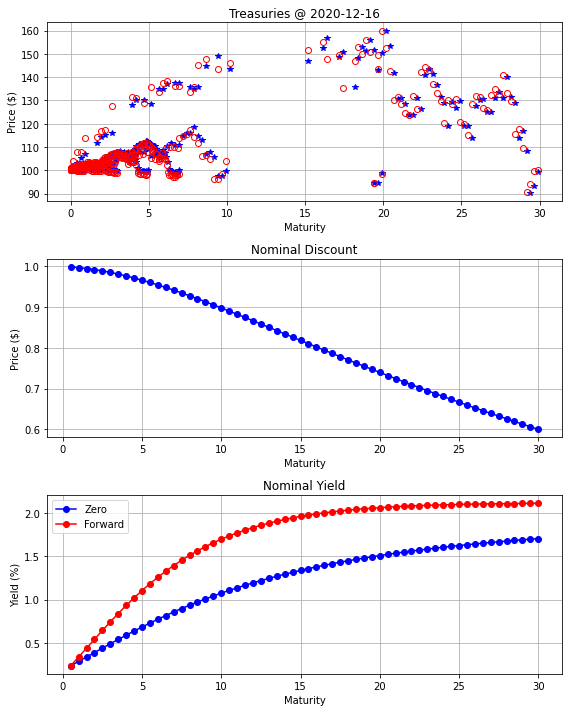

In [11]:
fig = plots.term_structure(
    nelson_siegel, prices, treasuries["MATURITY"], cashflows, maturities, quote_date
)